# Train a linear regression model

In this notebook, we are going to use the tensor module from PySINGA to train a linear regression model. We use this example to illustrate the usage of tensor of PySINGA. Please refer the [documentation page](http://singa.apache.org/en/docs/tensor.html) to for more tensor functions provided by PySINGA. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

To import the tensor module of PySINGA, run 

In [2]:
from singa import tensor

## The ground-truth

Our problem is to find a line that fits a set of 2-d data points.
We first plot the ground truth line, 

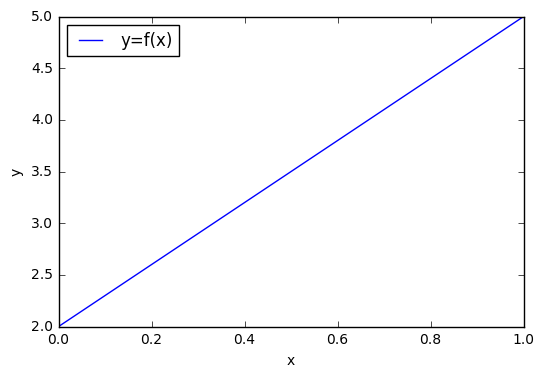

In [3]:
a, b = 3, 2
f = lambda x: a * x + b
gx = np.linspace(0.,1,100)
gy = [f(x) for x in gx]
plt.plot(gx, gy,  label='y=f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')


## Generating the trainin data

Then we generate the training data points by adding a random error to sampling points from the ground truth line.
30 data points are generated.

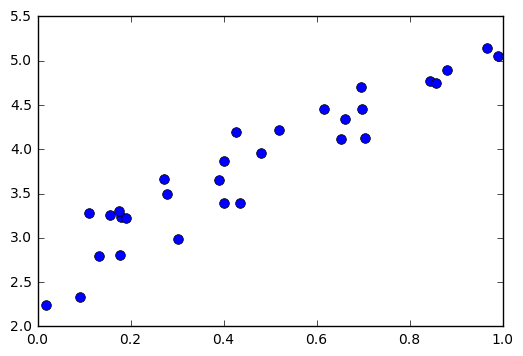

In [4]:
nb_points = 30

# generate training data
train_x = np.asarray(np.random.uniform(0., 1., nb_points), np.float32)
train_y = np.asarray(f(train_x) + np.random.rand(30), np.float32)
plt.plot(train_x, train_y, 'bo', ms=7)

## Training via SGD

Assuming that we know the training data points are sampled from a line, but we don't know the line slope and offset. The training is then to learn the slop (k) and intercept (b) by minimizing the error, i.e. ||kx+b-y||^2. 
1. we set the initial values of k and b (could be any values).
2. we iteratively update k and b by moving them in the direction of reducing the prediction error, i.e. in the gradient direction. For every iteration, we plot the learned line.

In [6]:
def plot(idx, x, y):
    global gx, gy, axes
    # print the ground truth line
    axes[idx/5, idx%5].plot(gx, gy, label='y=f(x)')     
    # print the learned line
    axes[idx/5, idx%5].plot(x, y, label='y=kx+b')
    axes[idx/5, idx%5].legend(loc='best')

# set hyper-parameters
max_iter = 15
alpha = 0.1

# init parameters
k, b = 2.,0.

SINGA tensor module supports basic linear algebra operations, like `+ - * /`, and advanced functions including axpy, gemm, gemv, and random function (e.g., Gaussian and Uniform).

SINGA Tensor instances could be created via **tensor.Tensor()** by specifying the shape, and optionally the device and data type. Note that every Tensor instance should be initialized (e.g., via **set_value()** or random functions) before reading data from it. You can also create Tensor instances from numpy arrays,

* numpy array could be converted into SINGA tensor via **tensor.from_numpy(np_ary)** 
* SINGA tensor could be converted into numpy array via **tensor.to_numpy()**; Note that the tensor should be on the host device. tensor instances could be transferred from other devices to host device via **to_host()**

Users cannot read a single cell of the Tensor instance. To read a single cell, users need to convert the Tesnor into a numpy array.


8.4457921346
6.52662099202
5.04807383219
3.90897369385
3.03137512207
2.35523325602
1.83428827922
1.43290456136
1.12362861633
0.885310490926
0.701658376058
0.560119374593
0.451024500529
0.366924413045
0.3020805041


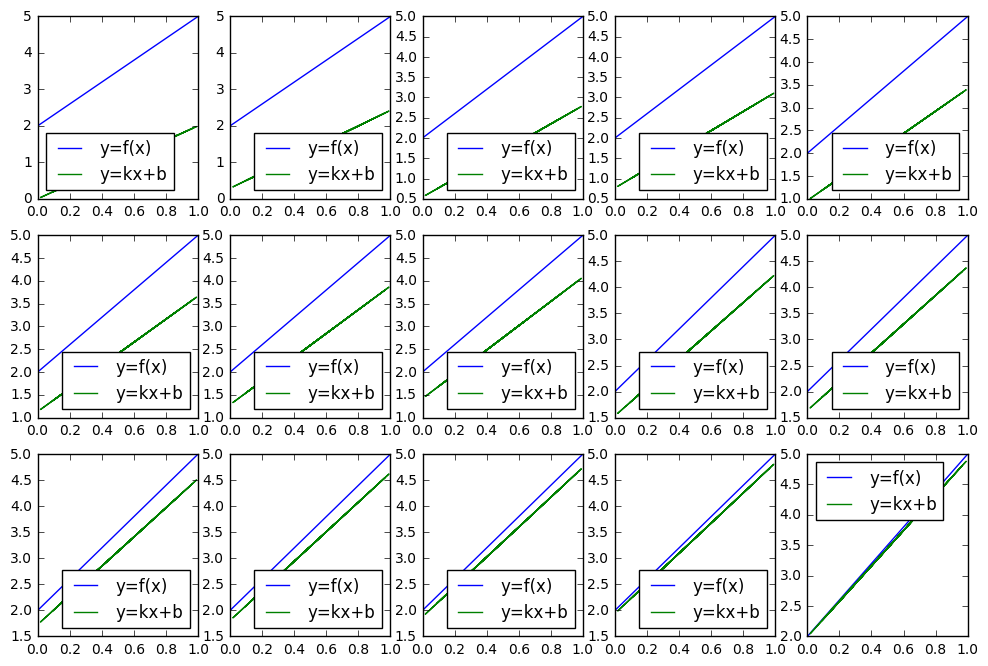

In [7]:
# to plot the intermediate results
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
x = tensor.from_numpy(train_x)
y = tensor.from_numpy(train_y)
# sgd
for idx in range(max_iter):
    y_ = x * k + b
    err = y_ - y
    loss = tensor.sum(err * err) / nb_points
    print loss
    da1 = tensor.sum(err * x) / nb_points
    db1 = tensor.sum(err) / nb_points
    # update the parameters
    k -= da1 * alpha
    b -= db1 * alpha
    plot(idx, tensor.to_numpy(x), tensor.to_numpy(y_))


We can see that the learned line is becoming closer to the ground truth line.